<a href="https://colab.research.google.com/github/68291410/Project-Mandiri/blob/main/Customer_Segmentation_2_Khafidha_Nur_Arifin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CAPSTONE PROJECT - CLUSTERING

#### IMPORT PACKAGES

In [ ]:
# import package
import os
import pandas as pd
import numpy as np
from scipy.stats import chi2
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn .preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

# Package untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

#### READ DATASET

In [ ]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Membuat path untuk mengidentifikasi letak directory
path = '/content/gdrive/MyDrive/Colab Notebooks/Data/'
# Cek directory
os.listdir(path)

['Superstore_.csv', 'marketing.csv', 'reservasi_hotel.csv']

In [ ]:
# Load data
df = pd.read_csv(os.path.join(path, "Superstore_.csv"),encoding="ISO-8859-1",delimiter=';')
df.head()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,419.136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.582
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,68.714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9.575.775,5,0.45,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,25.164


#### PROBLEM STATEMENT

Superstore ingin melakukan revenue optimization. Selain itu, Superstore juga ingin memberikan promo kepada pelanggannya, sehingga harus dilakukan suatu analisis dari data. Analisis RFM digunakan untuk mengelompokkan pelanggan menjadi tiga kelompok, yaitu pelanggan silver, pelanggan gold, dan pelanggan platinum.
1. pelanggan platinum adalah kelompok pelanggan yang sering berbelanja dan mengeluarkan uang besar untuk berbelanja
2. Pelanggan silver adalah kelompok pelanggan yang jarang berbelanja dan mengeluarakan sedikit uang untuk belanja
3. Pelanggan gold adalah kelompok pelanggan di antara pelanggan silver dan platinum

ketiga pengelompokan pelanggan diatas berhubungan dengan pembelian promo, mana pelanggan yang akan diberi promo besar, sedang, atau kecil?

#### EDA

In [ ]:
# Cek informasi yang terdapat di data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              9994 non-null   int64  
 1   ID_pesanan         9994 non-null   object 
 2   Tanggal_pesan      9994 non-null   object 
 3   Tanggal_kirim      9994 non-null   object 
 4   Metode_pengiriman  9994 non-null   object 
 5   ID_pelanggan       9994 non-null   object 
 6   Nama_pelanggan     9994 non-null   object 
 7   Segmen_pelanggan   9994 non-null   object 
 8   Kota               9994 non-null   object 
 9   Negara             9994 non-null   object 
 10  Kode_pos           9994 non-null   int64  
 11  Wilayah            9994 non-null   object 
 12  ID_produk          9994 non-null   object 
 13  Kategori           9994 non-null   object 
 14  Sub_kategori       9994 non-null   object 
 15  Nama_produk        9994 non-null   object 
 16  Penjualan          9994 

In [ ]:
#Ubah data penjualan dan untung ke float
df['Penjualan'] = df['Penjualan'].apply(lambda x: float(x.split()[0].replace('.', '')))
df['Untung'] = df['Untung'].apply(lambda x: float(x.split()[0].replace('.', '').replace('\u00A0', '')))

In [ ]:
df.nunique()

Index                9994
ID_pesanan           5009
Tanggal_pesan        1237
Tanggal_kirim        1334
Metode_pengiriman       4
ID_pelanggan          793
Nama_pelanggan        793
Segmen_pelanggan        3
Kota                  531
Negara                 49
Kode_pos              631
Wilayah                 4
ID_produk            1862
Kategori                3
Sub_kategori           17
Nama_produk          1850
Penjualan            5336
Kuantitas              14
Discount               12
Untung               7063
dtype: int64

In [ ]:
# Analisa deskriptif
df.describe()

,Index,Kode_pos,Penjualan,Kuantitas,Discount,Untung
count,9994.000000,9994.000000,9.994000e+03,9994.000000,9994.000000,9.994000e+03
mean,4997.500000,55190.379428,1.132271e+05,3.789574,0.156203,1.800957e+05
std,2885.163629,32063.693350,5.186212e+05,2.225110,0.206452,1.722971e+06
min,1.000000,1040.000000,3.000000e+00,1.000000,0.000000,-3.839990e+07
25%,2499.250000,23223.000000,2.516000e+03,2.000000,0.000000,2.245000e+03
50%,4997.500000,56430.500000,1.108800e+04,3.000000,0.200000,3.630900e+04
75%,7495.750000,90008.000000,5.399175e+04,5.000000,0.200000,1.509840e+05
max,9994.000000,99301.000000,2.396266e+07,14.000000,0.800000,6.719981e+07


Karena pada kolom untung terdapat negativ, sehingga dapat dikatakan terdapat rugi dan untung.

1. Analisis Customer

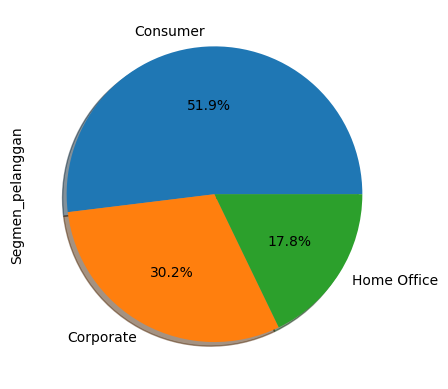

In [ ]:
# Analisis Customer
df['Segmen_pelanggan'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
#jumlah produk tiap kategori
df['Segmen_pelanggan'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segmen_pelanggan, dtype: int64

Visualisasi di atas terlihat bahwa terdapat 3 kelompok pelanggan yaitu consumer, corporate, dan home office. pelanggan yang paling banyak dari kelompok consumer.

2. Analisis Produk

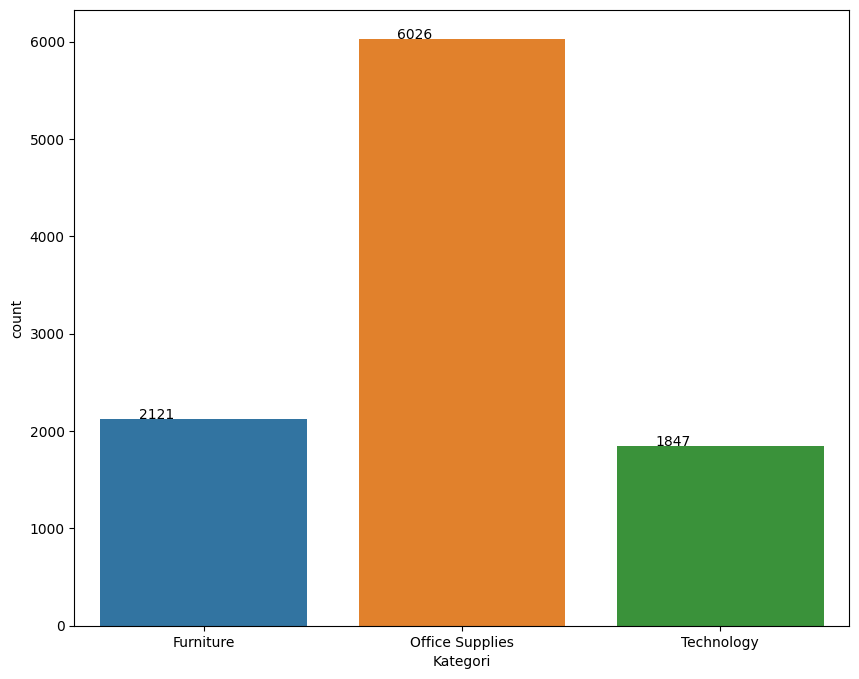

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
s = sns.countplot(x='Kategori', data=df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))

Visualisasi diatas, terdapat tiga kategori produk, yang mana produk yang paling diminati adalah produk dengan kategori office suplies.

In [ ]:
#jumlah produk tiap sub-kategori
df['Sub_kategori'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub_kategori, dtype: int64

terdapat 17 sub kategori produk, yang mana binders merupakan sub kategori produk yang banyak diminati oleh pelanggan

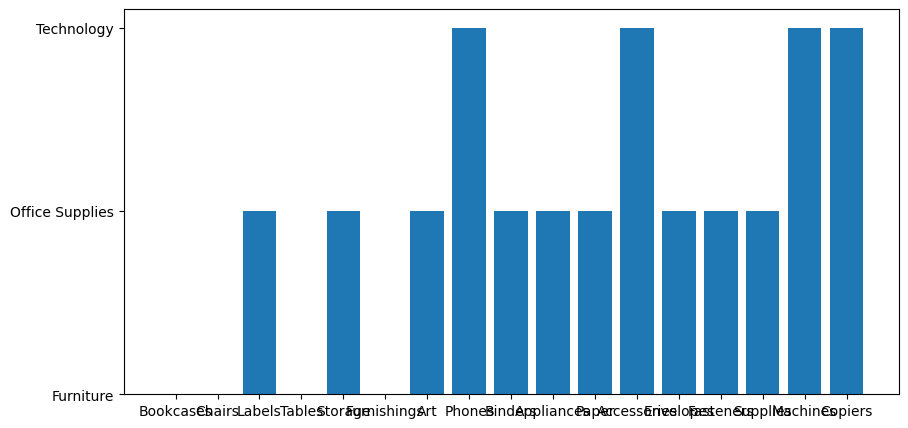

In [ ]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(10,5))
plt.bar('Sub_kategori','Kategori',data=df)
plt.show()

Dari visualisasi diatas, terlihat
- Produk kategori Furniture terdapat 4 sub-kategori yaitu Bookcase, Chairs, Tables, Furnishings
- Produk kategori Office Supplies terapat 9 sub-kategori
- Produk kategori Technology terdapat 4 sub-kategori yaitu Phone, Accessories, Machines, Copiers


3. Analisis Order

In [ ]:
df['Tanggal_pesan'] = pd.to_datetime(df['Tanggal_pesan'])
df['tahun_order'] = df['Tanggal_pesan'].dt.year

Text(0.5, 1.0, 'Penjualan dan Keuntungan per tahun')

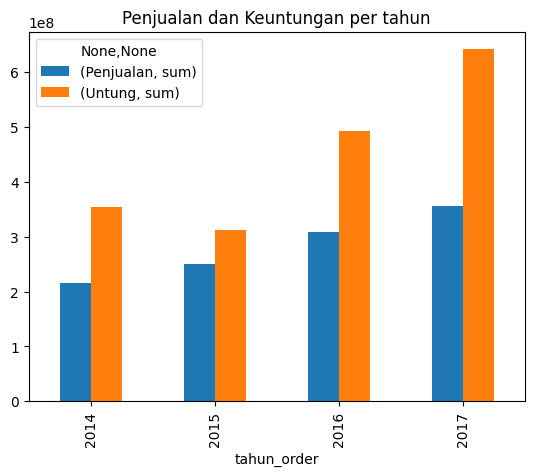

In [ ]:
#Penjualan per tahun
df.groupby('tahun_order')['Penjualan','Untung'].agg(['sum']).plot.bar()
plt.title('Penjualan dan Keuntungan per tahun')

Dari visualisasi diatas, terlihat pada tahun 2015 penjualan mengalami peningkatan tetapi keuntungan mengalami penurunan, sehingga dapat dikatakan bahwa platfrom mengalami kerugian pada tahun 2015. Dan pada tahun 2016-2017 terjadi peningkatan pada penjualan maupun keuntungan.

#### DATA PRE-PROCESSING

In [ ]:
df.head()

,Index,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,...,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,tahun_order
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196.0,2,0.00,419136.0,2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.00,219582.0,2016
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.00,68714.0,2016
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0,2015
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.20,25164.0,2015


In [ ]:
# Cek missing value
df.isna().sum()

Index                0
ID_pesanan           0
Tanggal_pesan        0
Tanggal_kirim        0
Metode_pengiriman    0
ID_pelanggan         0
Nama_pelanggan       0
Segmen_pelanggan     0
Kota                 0
Negara               0
Kode_pos             0
Wilayah              0
ID_produk            0
Kategori             0
Sub_kategori         0
Nama_produk          0
Penjualan            0
Kuantitas            0
Discount             0
Untung               0
tahun_order          0
dtype: int64

Tidak terdapat missing value pada data

In [ ]:
#Drop kolom Index
df=df.drop('Index',axis=1)
df.head()

,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,tahun_order
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196.0,2,0.00,419136.0,2016
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.00,219582.0,2016
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.00,68714.0,2016
3,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0,2015
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.20,25164.0,2015


In [ ]:
#cek duplicate
duplicate = df[df.duplicated()]
duplicate

,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,tahun_order
3406,US-2014-150119,2014-04-23,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281372.0,2,0.3,-120588.0,2014


In [ ]:
#drop duplicate data
df.drop_duplicates(inplace=True)

In [ ]:
# Cek ukuran data apakah duplicate sudah terhapus
df.shape

(9993, 20)

In [ ]:
# numerical
num_list = ['Penjualan', 'Kuantitas','Discount','Untung']

In [ ]:
# percentage outlier
for col in df[num_list].columns:

    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df[num_list][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df[num_list].iloc[outliers_index]

    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df[num_list][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))

 Penjualan : 0.96%
 Kuantitas : 1.13%
 Discount : 3.00%
 Untung : 0.98%


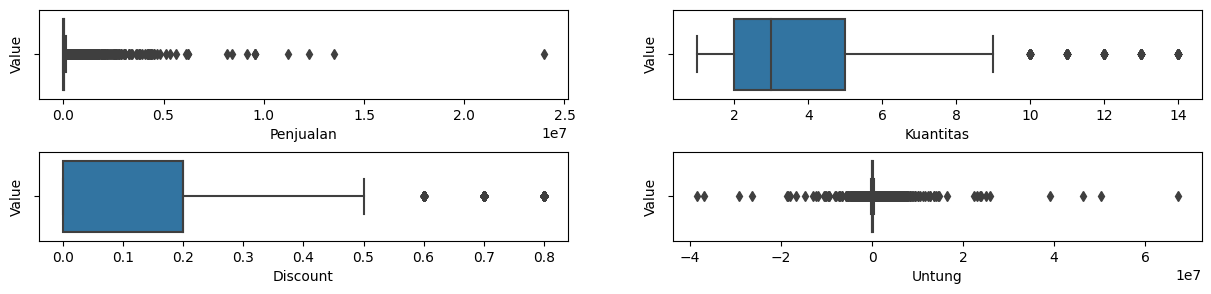

In [ ]:
# Boxplot outlier
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,3), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[num_list].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df[num_list][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")

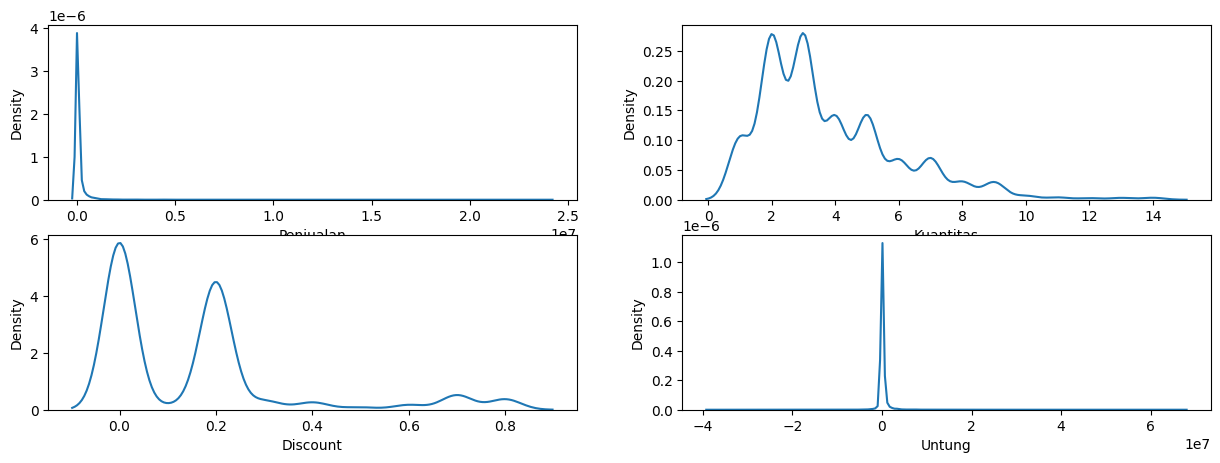

In [ ]:
# check data distribution
plt.figure(figsize=(15,5), )
for i, col in enumerate(df[num_list].columns):
    if df[num_list][col].dtype != 'object':
        ax = plt.subplot(2, 2, i+1)
        sns.kdeplot(df[num_list][col], ax=ax)
        plt.xlabel(col)
plt.show()


In [ ]:
# calculate the interquartile range (IQR) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


In [ ]:
# outliers into index array
outl_index = df[num_list][((df[num_list] < (Q1 - 1.5 * IQR)) |(df[num_list] > (Q3 + 1.5 * IQR))).any(axis=1)].index.tolist()

# drop outlier from dataset
df2 = df.drop(index=outl_index, axis=1)

In [ ]:
# percentage outlier
for col in df2[num_list].columns:
    # Identify the outliers using Z-score method
    z_scores = stats.zscore(df2[num_list][col])
    outliers_index = np.where(np.abs(z_scores) > 3)
    outliers = df2[num_list].iloc[outliers_index]
    # calculate the percentage of outliers
    outliers_percentage = len(outliers) / len(df2[num_list][col]) * 100
    print(" {} : {:.2f}%".format(col, outliers_percentage))

 Penjualan : 3.18%
 Kuantitas : 0.00%
 Discount : 0.28%
 Untung : 2.04%


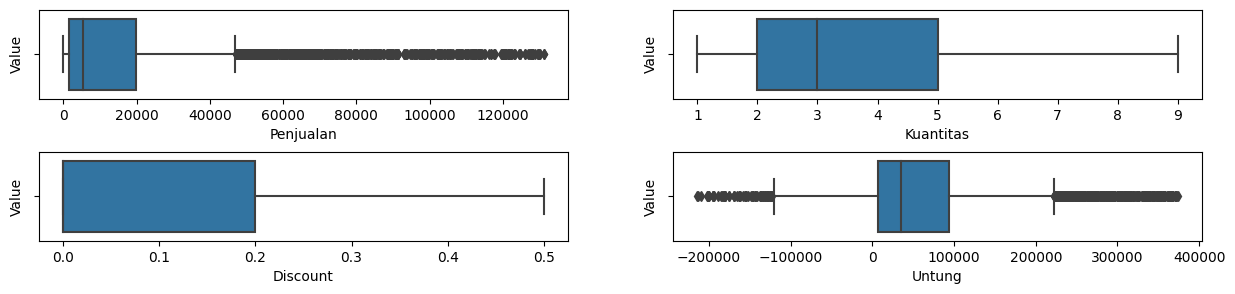

In [ ]:
# Boxplot outlier
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,3), gridspec_kw={'hspace': 0.6})
axes = axes.flatten()

for i, column in enumerate(df[num_list].columns):
    # Create a boxplot of the column
    sns.boxplot(x=df2[num_list][column], ax=axes[i])
    # Add a title to the plot
    axes[i].set_ylabel("Value")



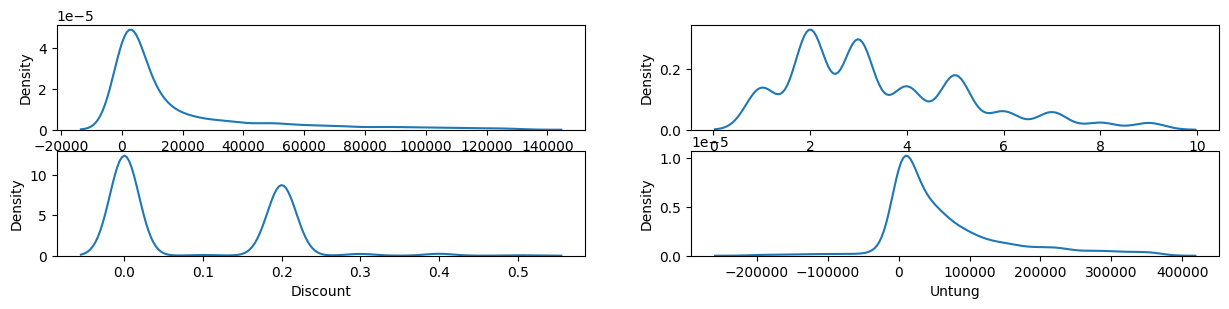

In [ ]:
# check data distribution
plt.figure(figsize=(15,3))
for i, col in enumerate(df2[num_list].columns):
    if df2[num_list][col].dtype != 'object':
        ax = plt.subplot(2, 2, i+1)
        sns.kdeplot(df2[num_list][col], ax=ax)
        plt.xlabel(col)
plt.show()

Tidak dilakukan handling lagi agar akurasi data tidak menurun

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6673 entries, 1 to 9993
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_pesanan         6673 non-null   object        
 1   Tanggal_pesan      6673 non-null   datetime64[ns]
 2   Tanggal_kirim      6673 non-null   object        
 3   Metode_pengiriman  6673 non-null   object        
 4   ID_pelanggan       6673 non-null   object        
 5   Nama_pelanggan     6673 non-null   object        
 6   Segmen_pelanggan   6673 non-null   object        
 7   Kota               6673 non-null   object        
 8   Negara             6673 non-null   object        
 9   Kode_pos           6673 non-null   int64         
 10  Wilayah            6673 non-null   object        
 11  ID_produk          6673 non-null   object        
 12  Kategori           6673 non-null   object        
 13  Sub_kategori       6673 non-null   object        
 14  Nama_pro

#### FEATURE ENGINEERING

In [ ]:
# Data kategori
categorical = ["Metode_pengiriman","Segmen_pelanggan","Negara","tahun_order", "Kategori", "Sub_kategori"]
df_categorical = df2[categorical]
df_categorical.head()

,Metode_pengiriman,Segmen_pelanggan,Negara,tahun_order,Kategori,Sub_kategori
1,Second Class,Consumer,Kentucky,2016,Furniture,Chairs
2,Second Class,Corporate,California,2016,Office Supplies,Labels
4,Standard Class,Consumer,Florida,2015,Office Supplies,Storage
5,Standard Class,Consumer,California,2014,Furniture,Furnishings
6,Standard Class,Consumer,California,2014,Office Supplies,Art


In [ ]:
# Merubah data kategori menjadi numerik
label_encoder = LabelEncoder()
encoded_data = df2[categorical].apply(label_encoder.fit_transform)

# Menggabungkan kolom umur dan nilai belanja setahun dengan data kategori
df = pd.concat([encoded_data, df2[["Tanggal_pesan","ID_pesanan","ID_produk","ID_pelanggan","Penjualan" ,"Kuantitas", "Discount", "Untung"]]], axis=1)

df.head()

,Metode_pengiriman,Segmen_pelanggan,Negara,tahun_order,Kategori,Sub_kategori,Tanggal_pesan,ID_pesanan,ID_produk,ID_pelanggan,Penjualan,Kuantitas,Discount,Untung
1,2,0,15,2,0,5,2016-11-08,CA-2016-152156,FUR-CH-10000454,CG-12520,73194.0,3,0.0,219582.0
2,2,1,3,2,1,10,2016-06-12,CA-2016-138688,OFF-LA-10000240,DV-13045,1462.0,2,0.0,68714.0
4,3,0,8,1,1,14,2015-10-11,US-2015-108966,OFF-ST-10000760,SO-20335,22368.0,2,0.2,25164.0
5,3,0,3,0,0,9,2014-06-09,CA-2014-115812,FUR-FU-10001487,BH-11710,4886.0,7,0.0,141694.0
6,3,0,3,0,1,2,2014-06-09,CA-2014-115812,OFF-AR-10002833,BH-11710,728.0,4,0.0,19656.0


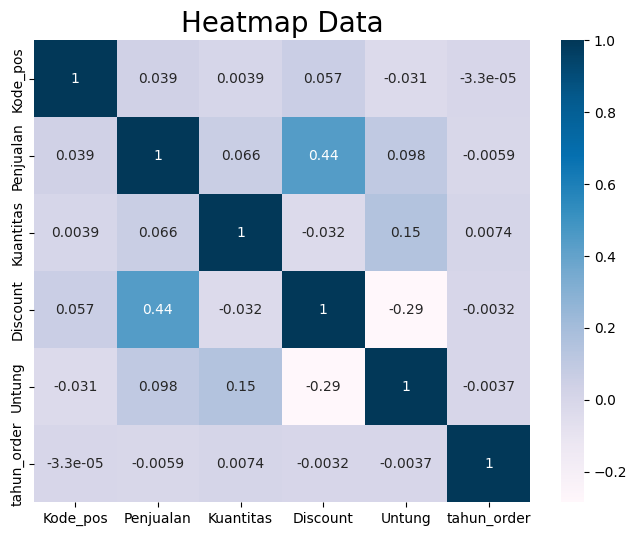

In [ ]:
# Features Selection
plt.figure(figsize=(8,6))
sns.heatmap(df2.corr(), cmap = 'PuBu', annot = True)
plt.title('Heatmap Data', fontsize = 20)
plt.show()

In [ ]:
# Drop variabel yang tidak dibutuhkan
cluster_data = df2.drop(["Metode_pengiriman","Discount","Untung"], axis = 1)
cluster_data.head()

,ID_pesanan,Tanggal_pesan,Tanggal_kirim,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,tahun_order
1,CA-2016-152156,2016-11-08,11/11/2016,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,2016
2,CA-2016-138688,2016-06-12,6/16/2016,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,2016
4,US-2015-108966,2015-10-11,10/18/2015,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,2015
5,CA-2014-115812,2014-06-09,6/14/2014,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,4886.0,7,2014
6,CA-2014-115812,2014-06-09,6/14/2014,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,728.0,4,2014


In [ ]:
#Melihat jumlah produk, jumlah transaksi, dan pelanggan
cust_x_prod = pd.DataFrame([{'products':len(df['ID_produk'].value_counts()),
'transactions': len(df2['ID_pesanan'].value_counts()),
'customers': len(df2['ID_pelanggan'].value_counts()),}],
columns = ['products', 'transactions', 'customers'], index = ['quantity'])
print(cust_x_prod)

          products  transactions  customers
quantity      1619          4003        788


In [ ]:
#tanggal maksimum data
df2['Tanggal_pesan'].max()

Timestamp('2017-12-30 00:00:00')

In [ ]:
df2.tail()

,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,Wilayah,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,tahun_order
9988,CA-2017-163629,2017-11-17,11/21/2017,Standard Class,RA-19885,Ruben Ausman,Corporate,Athens,Georgia,30605,South,TEC-PH-10004006,Technology,Phones,Panasonic KX - TS880B Telephone,2061.0,5,0.0,55647.0,2017
9989,CA-2014-110422,2014-01-21,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25248.0,3,0.2,41028.0,2014
9990,CA-2017-121258,2017-02-26,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,9196.0,2,0.0,156332.0,2017
9992,CA-2017-121258,2017-02-26,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",296.0,4,0.0,1332.0,2017
9993,CA-2017-119914,2017-05-04,05/09/2017,Second Class,CC-12220,Chris Cortes,Consumer,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",24316.0,2,0.0,72948.0,2017


In [ ]:
#ambil data paling terakhir transaksi
import datetime as dt
now = dt.date(2017,12,30)

In [ ]:
df2['date'] = pd.DatetimeIndex(df2.Tanggal_pesan).date

In [ ]:
df2.head()

,ID_pesanan,Tanggal_pesan,Tanggal_kirim,Metode_pengiriman,ID_pelanggan,Nama_pelanggan,Segmen_pelanggan,Kota,Negara,Kode_pos,...,ID_produk,Kategori,Sub_kategori,Nama_produk,Penjualan,Kuantitas,Discount,Untung,tahun_order,date
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.0,219582.0,2016,2016-11-08
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.0,68714.0,2016,2016-06-12
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.2,25164.0,2015,2015-10-11
5,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,4886.0,7,0.0,141694.0,2014,2014-06-09
6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,California,90032,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,728.0,4,0.0,19656.0,2014,2014-06-09


#### MODELING

RFM Analysis

1. Recency

In [ ]:
#Group by berdasarkan customer terakhir membeli

recency_df = df2.groupby(['ID_pelanggan'],as_index=False)['date'].max()
recency_df.columns = ['ID_pelanggan','LastPurchaseDate']
recency_df.head()

,ID_pelanggan,LastPurchaseDate
0,AA-10315,2017-06-29
1,AA-10375,2017-12-11
2,AA-10480,2017-04-15
3,AA-10645,2017-11-05
4,AB-10015,2014-03-07


Customer ID AA-10315, terakhir melakukan pembelian di toko tanggal 29 Juni 2017, dst

In [ ]:
#hitung seberapa sering dia membeli dengan mengacu pada tanggal terbaru dalam beberapa hari

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)
recency_df.head()

,ID_pelanggan,LastPurchaseDate,Recency
0,AA-10315,2017-06-29,184
1,AA-10375,2017-12-11,19
2,AA-10480,2017-04-15,259
3,AA-10645,2017-11-05,55
4,AB-10015,2014-03-07,1394


Output dari dari data diatas, diapat Customer ID AA-10315 memliki recency 184, yang artinya Customer ID AA-10315 tidak belanja selama 184 hari, dst

2. Frequency

In [ ]:
#periksa frekuensi pelanggan berarti sudah berapa kali transaksi

frequency_df = df2.copy()
frequency_df.drop_duplicates(subset=['ID_pelanggan','Tanggal_pesan'], keep="first", inplace=True)
frequency_df = frequency_df.groupby('ID_pelanggan',as_index=False)['Tanggal_pesan'].count()
frequency_df.columns = ['ID_pelanggan','Frequency']
frequency_df.head()

,ID_pelanggan,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,2


Dari output Frequency diatas, dapat dilihat Customer ID AA-10315 melakukan transaksi sebanyak lima kali, Customer ID AA-10375 melakukan transaksi sebanyak sembilan kali, dst

3. Monetary

In [ ]:
df2['Total_cost'] = df2['Penjualan'] * df2['Kuantitas']

In [ ]:
monetary_df=df2.groupby('ID_pelanggan',as_index=False)['Total_cost'].sum()
monetary_df.columns = ['ID_pelanggan','Monetary']
monetary_df.head()

,ID_pelanggan,Monetary
0,AA-10315,166080.0
1,AA-10375,261399.0
2,AA-10480,178749.0
3,AA-10645,991613.0
4,AB-10015,152224.0


monetary : berapa banyak uang cuts yang dikeluarkan

Dari output monetary diatas, terlihat bahwa Customer ID AA-10315 mengeluarkan uang sebanyak 166080.0, dst

In [ ]:
#combine first recency and frequency
rf = recency_df.merge(frequency_df,left_on='ID_pelanggan',right_on='ID_pelanggan')

#combibe rf frame with monetary values
rfm = rf.merge(monetary_df,left_on='ID_pelanggan',right_on='ID_pelanggan')
rfm.set_index('ID_pelanggan',inplace=True)
rfm.head()

,LastPurchaseDate,Recency,Frequency,Monetary
ID_pelanggan,,,,
AA-10315,2017-06-29,184,5,166080.0
AA-10375,2017-12-11,19,9,261399.0
AA-10480,2017-04-15,259,4,178749.0
AA-10645,2017-11-05,55,6,991613.0
AB-10015,2014-03-07,1394,2,152224.0


In [ ]:
rfm.drop(columns=['LastPurchaseDate'],inplace=True)
rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,5,166080.0
AA-10375,19,9,261399.0
AA-10480,259,4,178749.0
AA-10645,55,6,991613.0
AB-10015,1394,2,152224.0


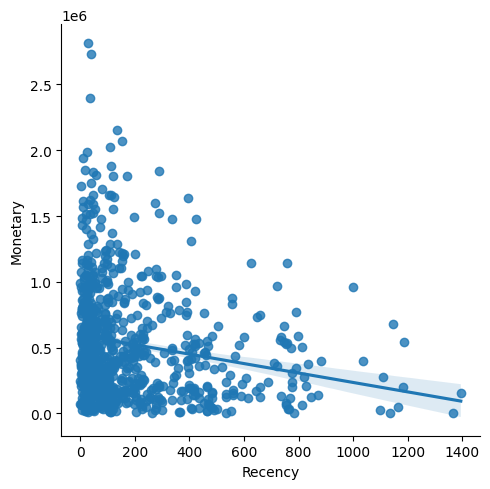

In [ ]:
# Monetary vs Recency for each segment
sns.lmplot(x='Recency', y='Monetary', data=rfm,fit_reg=True)

Dari visualisasi diatas  dapat dilihat bawa mereka yang cukup rajin mengunjungi platform memiliki monetary yang besar. Terlihat bahawa recency antara 0-400 sering melakukan spending.


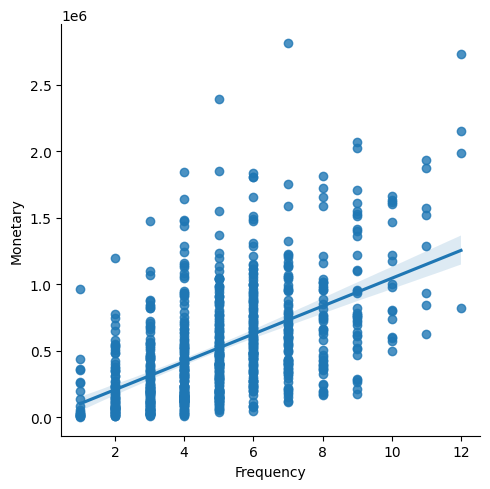

In [ ]:
sns.lmplot(x='Frequency', y='Monetary', data=rfm,fit_reg=True)

Dari visualisasi diatas terlihat ada korelasi walaupun tidak terlalu kuat antara Frequency dan Monetary. Banyaknya transaksi belum tentu memiliki monetary tinggi dan terdapat cust yang melakukan transaksi banyak dan spanding tinggi.

In [ ]:
#membagi dengan  data tiap kolom dengan quartil 1, 2, dan 3
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,36.0,3.0,188755.50
0.50,97.0,5.0,426455.00
0.75,236.0,6.0,747493.25


In [ ]:
#segmentasi
RFMScores= rfm.copy()
#Recency Scoring
def Rscoring(x,p,d):
   if x <= d[p][0.25]:
      return 1
   elif x <= d[p][0.50]:
      return 2
   elif x <= d[p][0.75]:
      return 3
   else:
      return 4
#Frequency and Monetary Scoring
def FMscoring (x,p,d):
   if x <= d[p][0.25]:
      return 4
   elif x <= d[p][0.50]:
      return 3
   elif x <= d[p][0.75]:
      return 2
   else:
      return 1
RFMScores['R']=RFMScores['Recency'].apply(Rscoring, args=('Recency',quantiles))
RFMScores['F']=RFMScores['Frequency'].apply(FMscoring, args=('Frequency',quantiles))
RFMScores['M']=RFMScores['Monetary'].apply(FMscoring, args=('Monetary',quantiles))
RFMScores['RFMgroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['Score']=RFMScores[['R','F','M']].sum(axis=1)
print(RFMScores.head())

              Recency  Frequency  Monetary  R  F  M RFMgroup  Score
ID_pelanggan                                                       
AA-10315          184          5  166080.0  3  3  4      334     10
AA-10375           19          9  261399.0  1  1  3      113      5
AA-10480          259          4  178749.0  4  3  4      434     11
AA-10645           55          6  991613.0  2  2  1      221      5
AB-10015         1394          2  152224.0  4  4  4      444     12


Dari output diatas, untuk setiap cust memiliki score R, F, dan M masing-masing.

contoh: Customer ID AA-10315 dengan tingkat recency 184, frequency 5, monetary 166080.0 memiliki R=3,F=3, M=4. Dengan kombinasi R, F, M dapat dikeolpokkan menjadi satu seperti pada kolom RFMgroup, dan jika dijumlahkan akan diperoleh hasil seperti pada kolom Score yaitu 10.

Dari hasil diatas, dapat dikatakan semakin besar score R maka Recency semakin memburuk, sedangkan semakin kecil score R maka Recency semakin membaik. bisa dibandingkan dengan Customer ID AA-10315 dan AA-10375, Customer ID AA-10375 memiliki score R=1 karena memiliki recency yang kecil atau lebih baik dari recency Coustomer ID AA-10315 yang memiliki score R=3.

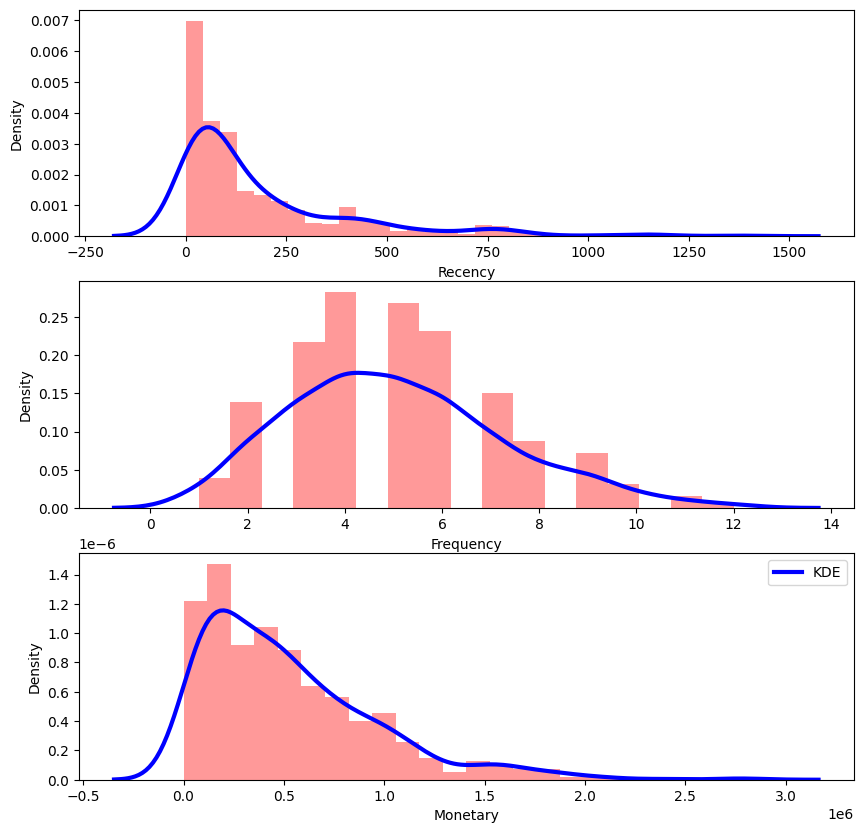

In [ ]:
#Melihat distibusi data hasil RFMScore
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(rfm['Recency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,2)
sns.distplot(rfm['Frequency'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.subplot(3,1,3)
sns.distplot(rfm['Monetary'],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"r"})
plt.legend()
plt.show()

Dari visualisasi diatas, dapat dilihat distribusi dari Recency, Frequency, dan Monetary.

- Recency : terdapat nilai recency yang lumayan kecil, arinya banyak recency lumayan baik, atau banyak customer yang telah belanja dalam waktu dekat
-Frequency : terdapat banyak customer yang melakukan transaksi sebanyak 5 kali, dan ada juga cust yang belanjanya sangat banyak
- Monetary : sedikit yang spendingnya besar sehingga datanya skew ke kanan. Dan terdapat outlier

In [ ]:
#membuat variabael khusus untuk clustering RFM
clustering_rfm = rfm[['Recency',"Frequency","Monetary"]].copy()
clustering_rfm.head()

,Recency,Frequency,Monetary
ID_pelanggan,,,
AA-10315,184,5,166080.0
AA-10375,19,9,261399.0
AA-10480,259,4,178749.0
AA-10645,55,6,991613.0
AB-10015,1394,2,152224.0


In [ ]:
#scaling menggunakan min max scaler
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(clustering_rfm)
data_scaled = pd.DataFrame(x_scaled,columns=['Recency','Frequency','Monetary'])
data_scaled

,Recency,Frequency,Monetary
0,0.131994,0.363636,0.058594
1,0.013630,0.727273,0.092455
2,0.185796,0.272727,0.063095
3,0.039455,0.454545,0.351850
4,1.000000,0.090909,0.053672
...,...,...,...
783,0.030846,0.727273,0.185175
784,0.002869,0.272727,0.082681
785,0.096126,0.363636,0.064755
786,0.038737,0.727273,0.550638


Elbow methot

Text(0.5, 1.0, 'Elbow plot for optimal number of clusters')

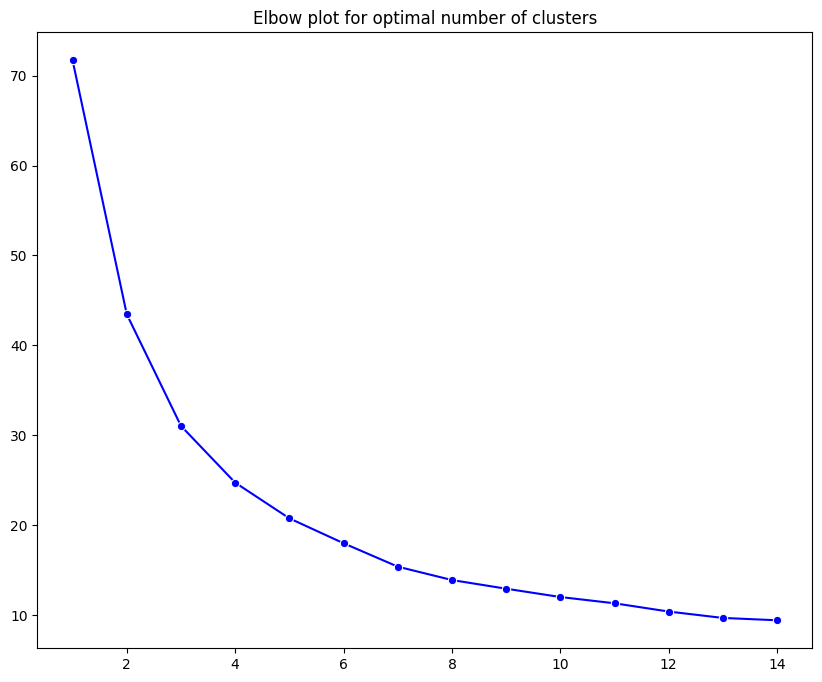

In [ ]:
#mencari nilai k menggunakan Elbow methode
wscc = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init="k-means++",random_state=0)
    kmeans.fit(data_scaled)
    wscc.append(kmeans.inertia_)

plt.figure(figsize=(10,8))
sns.lineplot(x=range(1,15),y=wscc,marker="o",c='blue')
plt.title("Elbow plot for optimal number of clusters")

::Dari output visualisasi Elbow methode, dapat dilihat bahwa perubahan sudut terbesar berada di k=3. Sehingga dapat diprediksi k optimal berada di k=3.

#### EVALUATION

In [ ]:
#evaluasi
range_n_clusters = range(2,10)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters)
    preds = clusterer.fit_predict(data_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(data_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.35195625702377
For n_clusters = 3, silhouette score is 0.34927777915661706
For n_clusters = 4, silhouette score is 0.31525104363036355
For n_clusters = 5, silhouette score is 0.3283062765863357
For n_clusters = 6, silhouette score is 0.32659312324217277
For n_clusters = 7, silhouette score is 0.32189864475732977
For n_clusters = 8, silhouette score is 0.30721601293351136
For n_clusters = 9, silhouette score is 0.3060312997113389


Dari silhouette model didapat k-kluster yang optimum adalah 3, sama seperti pemilihan cluster dengan elbow method. Oleh karena itu, untuk kedepannya akan digunakan k=3 yang artinya customer akan dibagi kedalam 3 kelompok.

In [ ]:
#melihat error dalam cluster
wscc

[71.71509248998339,
 43.456643011629744,
 31.035974034379002,
 24.726220036357688,
 20.75346273329294,
 17.982622149892755,
 15.378239073069459,
 13.8886009817545,
 12.923700298608907,
 11.999096597936797,
 11.300786509383453,
 10.38085267070868,
 9.671669747826693,
 9.411471406937729]

In [ ]:

#Clustering dengan mengunakan Kmeans.
kmeans = KMeans(n_clusters=3, random_state=0,init='k-means++',
                n_init =10,max_iter = 300).fit(data_scaled)
pred = kmeans.predict(data_scaled)
RFMScores['Cluster']=kmeans.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMgroup,Score,Cluster
ID_pelanggan,,,,,,,,,
AA-10315,184,5,166080.0,3,3,4,334,10,2
AA-10375,19,9,261399.0,1,1,3,113,5,1
AA-10480,259,4,178749.0,4,3,4,434,11,2
AA-10645,55,6,991613.0,2,2,1,221,5,1
AB-10015,1394,2,152224.0,4,4,4,444,12,0
AB-10060,54,8,164630.0,2,1,4,214,7,1
AB-10105,41,6,709634.0,2,2,2,222,6,1
AB-10150,41,4,841310.0,2,3,1,231,6,2
AB-10165,25,7,1165329.0,1,1,1,111,3,1


Dari Output clutering diatas, dapat dilihat bahwa cust sudah di sent ke kolompok-kelompok tertentu. Seperti Customer ID AA-10315 di sent ke Cluster 2, Customer ID AA-10375 di sent ke Cluster 1, Customer ID AA-10480 di sent ke Cluster 2, dst

In [ ]:
RFMScores.groupby('Cluster').mean().sort_values('Score',ascending=False)

,Recency,Frequency,Monetary,R,F,M,Score
Cluster,,,,,,,
0,634.269565,2.852174,313231.773913,4.000000,3.713043,3.069565,10.782609
2,118.806533,4.130653,334358.834171,2.344221,3.150754,2.959799,8.454774
1,93.192727,7.345455,897844.676364,2.080000,1.429091,1.596364,5.105455


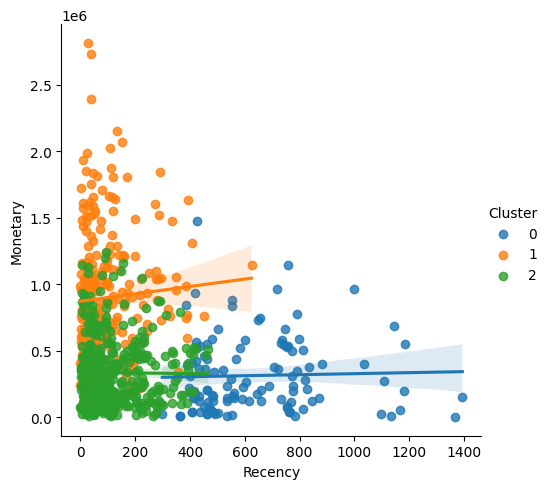

In [ ]:
sns.lmplot(x='Recency', y='Monetary', data=RFMScores, hue='Cluster', fit_reg=True)

Visualisasi diatas terlihat bahwa
- cluster 0 memiliki recency tinggi dan monetary rendah. Artinya pelanggan pada cluster 0 sudah lama tidak belanja dan sedikit mengeluarkan uang.
-customer 1 memiliki recency yang rendah dan monetary tinggi, artinya pelanggan pada cluster 1 tidak belanja dalam waktu dekat dan banyak mengeluarkan uang
- customer 2 memiliki monetary yang rendah dan monetary rendah . Artinya customer pada cluster 2 tidak belanja dalam waktu dekat dan mengeluarkan sedikit uang.

Sehingga jika dilihat dari recency dan monetarynya cluster 1 lebih baik daripada cluster 0 dan 2

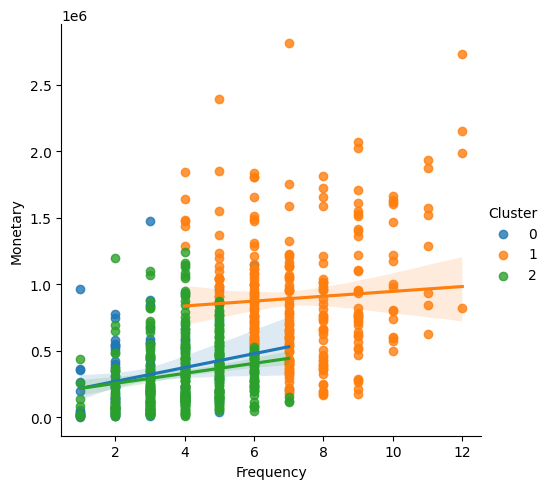

In [ ]:
sns.lmplot(x='Frequency', y='Monetary', data=RFMScores, hue='Cluster')

Visualisasi diatas terlihat bahwa
- cluster 0 memiliki frequency rendah dan monetary cukup rendah, artinya pelanggan pada cluster 0 sedikit melakukan transaksi dan cukup sedikit mengeluarkan uang.
-customer 1 memiliki frequency yang tinggi dan Monetary tinggi, artinya pelangan pada cluster 1 melakukan banyak transaksi dan mengeluarkan banyak uang
- customer 2 memiliki frequency yang rendah dan monetary rendah. artinya customer pada cluster 2 sedikit melakukan transaksi dan mengeluarkan uang.

Sehingga jika dilihat dari Frequency dan monetarynya cluster 1 lebih baik daripada cluster 0 dan 2

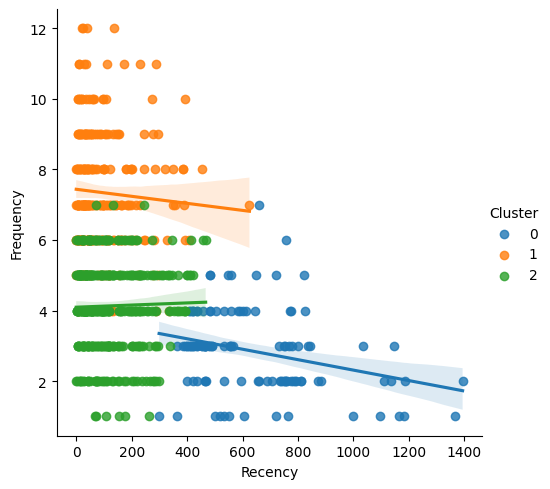

In [ ]:
sns.lmplot(x='Recency', y='Frequency', data=RFMScores, hue='Cluster', fit_reg=True)

Visualisasi diatas terlihat bahwa
- cluster 0 memiliki recenncy tinggi dan frequency rendah, artinya pelanggan pada cluster 0 sudah lama tidak belanja dan sedikit melakukan transaksi.
-customer 1 memiliki recency cukup rendah frequency tinggi, artinya pelanggan pada cluster 1 tidak belanja dalam waktu cukup dekat dan melakukan transaksi terbanyak.
- customer 2 memiliki recency rendah dan frequency cukup rendah. artinya customer pada cluster 2 tidak belanja dalam waktu dekat dan melakukan cukup sedikit transaksi

Sehingga jika dilihat dari Frequency dan monetarynya cluster 1 lebih baik daripada cluster 0 dan 2



### EDA

In [ ]:
df3 = pd.merge(df2, RFMScores, on='ID_pelanggan')

1. Analisis Customer

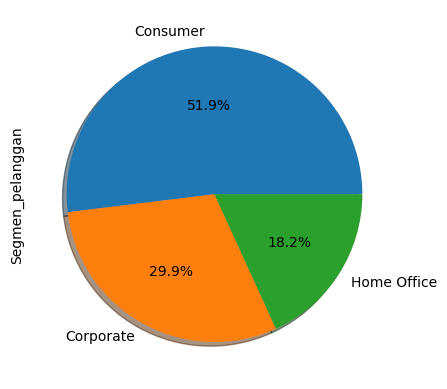

In [ ]:
# Analisis Customer
df3['Segmen_pelanggan'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [ ]:
#jumlah produk tiap kategori
df2['Segmen_pelanggan'].value_counts()

Consumer       3466
Corporate      1994
Home Office    1213
Name: Segmen_pelanggan, dtype: int64

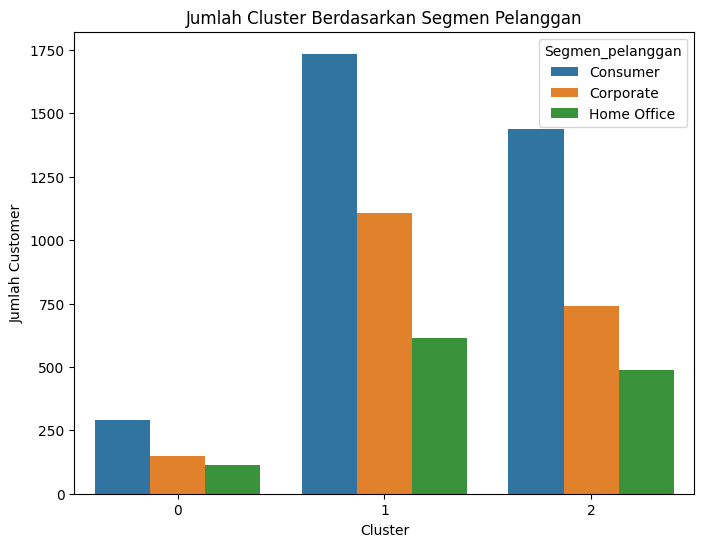

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Cluster", data=df3, hue="Segmen_pelanggan")
plt.title("Jumlah Cluster Berdasarkan Segmen Pelanggan")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

Dari visualisasi diatas, terlihat bahwa presentase
segmen pelanggan dan jumlah disetiap segmen berbeda dengan data sebelum dilakukan clustering. Dan terlihat bahwa pelanggan consumer mendominasi disetiap cluster


2. Analisis Produk

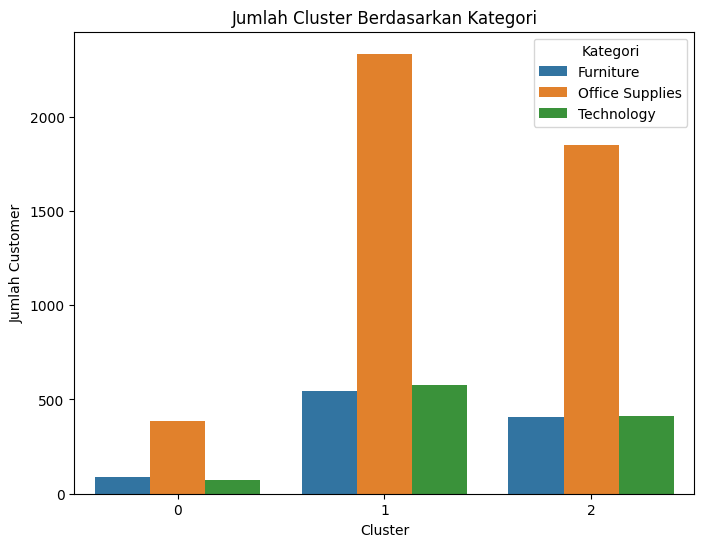

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Cluster", data=df3, hue="Kategori")
plt.title("Jumlah Cluster Berdasarkan Kategori")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Customer")
plt.show()

Analisis kategori produk sebelum dan sesudah dilaksanakan clustering sama, yaitu produk office supplies yang paling mendominasi. Dari visualisasi disamping terlihat produk dengan kategori office supplies mendominasi disetiap cluster.


3. Analisis Order

In [ ]:
df3['Tanggal_pesan'] = pd.to_datetime(df2['Tanggal_pesan'])
df3['tahun_order'] = df3['Tanggal_pesan'].dt.year

Text(0.5, 1.0, 'Penjualan dan Keuntungan per tahun')

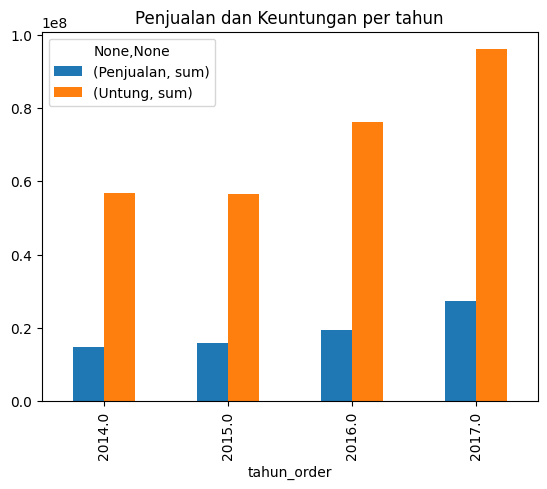

In [ ]:
#Penjualan per tahun
df3.groupby('tahun_order')['Penjualan','Untung'].agg(['sum']).plot.bar()
plt.title('Penjualan dan Keuntungan per tahun')

Analisis penjualan sebelum dan sesudah dilaksanakan clustering sama, yaitu terdapat penurunan pada tahun 2015


### KESIMPULAN/SARAN

Dari hasil analisis, diperoleh 3 cluster yaitu cluster 0, cluster 1, dan cluster 2.
- Cluster 0 memiliki recency tinggi, frequency rendah, dan monetary cukup rendah, artinya pelanggan kelompok ini sudah lama dan jarang melakukan transaksi sehingga uang yang dikeluarkan pelanggan sedikit, sehingga dapat katakan pelanggan ini merupakan pelanggan silver
- Cluster 1 memiliki recency cukup rendah, frequenci dan monetary tinggi, artinya  pelanggan kelompok ini masih sering dan paling sering melakukan transaksi sehingga uang yang dikeluarkan pelanggan sangat besar, sehingga dapat katakan pelanggan ini merupakan pelanggan platinum
- Cluster 2 memiliki recency, frequency, dan monetary rendah, artinya pelanggan pada cluster 2 rata-rata terakhir melakukan transaksi 4 bulan yang lalu, dan sedikit melakukan spending, sehingga dapat katakan pelanggan ini merupakan pelanggan gold

Untuk mengoptimalkan pendapatan superstor, ketiga kelompok tersebut akan diberikan promo
- pelanggan silverakan mendapat promo besar dan menarik agar pelanggan tergiur untuk belanja
- pelanggan gold akan mendapatkan promo sedang dan menarik agar pelanggan gold meningkat menjadi pelanggan platinum.
- pelanggan platinum akan mendapatkan promo kecil, karena pelanggan ini sudah rajin belanja
